# 画像処理のテスト

dataフォルダに格納されているdogとcatの2クラスの画像を分類するモデルを作成せよ。

サンプル数

- dog: 250枚
- cat: 250枚

訓練データ: 全体の70%をランダムに（seed=0）

AccuracyがValidationのデータに対して70%得られていること

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 自作モジュール
from my_libs.load_data import load_data
from my_libs.reset_seed import reset_seed
reset_seed()

## データ読み込み

In [2]:
train, test = load_data('../data/')
len(train), len(test)

(350, 150)

In [3]:
train[0], test[0]

(('../data/cat/192.jpg', 1), ('../data/cat/72.jpg', 1))

## モデル設計・学習・評価

In [4]:
import chainer
import chainer.links as L
import chainer.functions as F
from chainer.datasets import LabeledImageDataset

from my_libs.ChainerPipeline import ChainerPipeline

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.582386       0.629167                  2379.77     674.316               22.1043       
2           0.710227       0.585417                  285.401     404.935               43.7209       
3           0.752841       0.597917                  111.529     270.152               65.4893       
4           0.798295       0.677083                  94.3401     206.315               87.3698       
5           0.917614       0.677083                  18.8405     153.089               108.745       
6           0.96875        0.689583                  4.0796      150.097               130.591       
7           0.980114       0.708333                  1.31314     157.007               152.671       
8           0.946429       0.641667                  8.17117     212.201               173.42        
9           0.931818       0.702083                  9.94961     136.741            

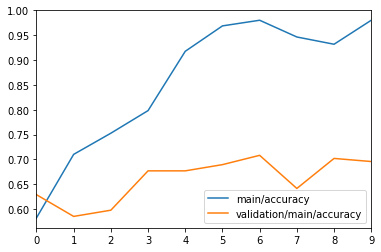

In [6]:
class MyProcessing:
    def __init__(self):
        pass
    
    def transform(seif, x):
        return LabeledImageDataset(x)
    
    
class MyCNN(chainer.Chain):
    def __init__(self, n_mid=100, n_out=2):
        super().__init__()
        with self.init_scope():
            self.cnv1 = L.Convolution2D(in_channels=3, 
                                        out_channels=16, 
                                        ksize=3,
                                        stride=1,
                                        pad=1)
            self.fc1 = L.Linear(None, n_mid)
            self.fco = L.Linear(None, n_out)
            
    def __call__(self, x):
        h = self.cnv1(x)
        h = F.relu(h)
        h = F.max_pooling_2d(h, 3, 3)
        h = self.fc1(h)
        h = self.fco(h)
        return h

setting = {
    'epoch': 10,
    'batch_size': 16,
    'use_gpu': False
}
    
p = ChainerPipeline(MyProcessing(), MyCNN(), train, test, setting)
model, resul = p.run()